# Import Necessary Library

In [1]:
!pip install pyspellchecker
!pip install googletrans
!pip install translatepy
# IF USING TPU
# !pip install nltk
# !pip install TextBlob
# !pip install wordcloud
# !pip install spacy
# !python3 -m spacy download en_core_web_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 38.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15715 sha256=6b444cbee131c153df839b2f6b44a508f33bf29a99b7334a6a91360216a225fb
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import math

import re
import string
import random
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from spellchecker import SpellChecker
from wordcloud import WordCloud
# from googletrans import Translator
from translatepy import Translator
import string
import random

# download some NLTK data
import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('brown')
nltk.download('omw-1.4')
nltk.download('wordnet2022')

# Ensure nltk wordnet data is downloaded
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')


# Load the spaCy model
import spacy
nlp = spacy.load('en_core_web_sm')

# Copy files from wordnet2022 to wordnet
! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet # temp fix for lookup error.

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import warnings 
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to /usr/share/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package wordnet2022 to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/wordnet2022.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading 

In [ ]:
# # Initialize the TPU
# resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
# tf.config.experimental_connect_to_cluster(resolver)
# tf.tpu.experimental.initialize_tpu_system(resolver)

# # Create a distribution strategy
# strategy = tf.distribute.experimental.TPUStrategy(resolver)

# Importing and Exploring the Dataset 

In [3]:
cols_names = ['Tweet_ID','Company','Sentiment','Tweet']
train_data = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv',names=cols_names)
val_data = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv',names=cols_names)

train_data.head()

,Tweet_ID,Company,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
val_data.head()

,Tweet_ID,Company,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [5]:
# Show the shapes of the datsets
print(f'The Shape of the Training Data are : {train_data.shape}')
print(f'The Shape of the Training Data are : {val_data.shape}')

The Shape of the Training Data are : (74682, 4)
The Shape of the Training Data are : (1000, 4)


In [6]:
# Show the Unique Category for each tweet
unique_cats = np.unique(train_data.Sentiment)
print(f'The Unique Sentiments in the dataset are {list(unique_cats)}')

The Unique Sentiments in the dataset are ['Irrelevant', 'Negative', 'Neutral', 'Positive']


In [7]:
# Drop the Column Tweet_ID
train_data.drop('Tweet_ID',axis=1,inplace=True)
val_data.drop('Tweet_ID',axis=1,inplace=True)
train_data.head()

,Company,Sentiment,Tweet
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


**Handle Missing Values**

In [9]:
def check_missings(df,df_name):
    missings = df.isna().sum()
    missings = missings[missings>0]
    if missings.empty:
        print(f'The {df_name} Dataset is Free of missings')
    else:
        print(f'The {df_name} Dataset Contains missings at columns {list(missings.index)} with values {list(missings.values)}')
    return missings
    

In [10]:
# Check for Missings
train_missings = check_missings(train_data,'Training')
val_missings = check_missings(val_data,'Validation')

The Training Dataset Contains missings at columns ['Tweet'] with values [686]
The Validation Dataset is Free of missings


In [11]:
# Drop The Missing Values From the training dataset
train_data.dropna(inplace=True)
train_data.isna().sum()

Company      0
Sentiment    0
Tweet        0
dtype: int64

**Check For Duplicates**

In [12]:
def clean_tweet_dataset(df, df_name):

    # Check for duplicates
    duplicates = df.duplicated()
    print(f"Number of duplicates for {df_name} dataset is {duplicates.sum()} rows")

    # Display the duplicate rows, if any
    if duplicates.sum() > 0:
        print("Duplicate rows:")
        print(df[duplicates])

    # Handle duplicates by removing them
    df_cleaned = df.drop_duplicates()

    # Verify that duplicates are removed
    print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")

    # Save the cleaned dataset to a new CSV file
    return df_cleaned

In [13]:
# Check and Clean Duplicates for the training dataset
cleaned_train_data = clean_tweet_dataset(train_data, 'Training')
cleaned_val_data = clean_tweet_dataset(val_data, 'Validation')

Number of duplicates for Training dataset is 3038 rows
Duplicate rows:
           Company Sentiment  \
20     Borderlands  Positive   
26     Borderlands  Negative   
51     Borderlands   Neutral   
64     Borderlands   Neutral   
146    Borderlands  Negative   
...            ...       ...   
74528       Nvidia   Neutral   
74589       Nvidia   Neutral   
74591       Nvidia   Neutral   
74619       Nvidia  Positive   
74636       Nvidia  Positive   

                                                   Tweet  
20     that was the first borderlands session in a lo...  
26     The biggest disappointment of my life came a y...  
51     Blaming Sight for Tardiness! A little bit of b...  
64                                                  .. [  
146                                      "What a bitch!"  
...                                                  ...  
74528                                         What next?  
74589  Heard people are having issues with ordering t...  
74591        

**Show the Distribution of the teets Sentiments** 

In [14]:
def plot_sentiment_distribution(df,df_name):
    """
    Plot a bar plot and a donut chart showing the distribution of sentiments.

    :param df: pandas DataFrame, the input DataFrame containing a 'Sentiment' column
    :return: None
    """
    # Count the occurrences of each sentiment
    sentiment_counts = df['Sentiment'].value_counts()

    # Create subplots: 1 row, 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f'Distribution For {df_name} Dataset',fontsize=20)

    # Plot 1: Bar Plot
    ax1 = axes[0]
    sentiment_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightgreen', 'salmon','red'])
    ax1.set_title('Distribution of Sentiments')
    ax1.set_xlabel('Sentiment')
    ax1.set_ylabel('Count')

    # Add value labels on top of each bar
    for i in ax1.patches:
        ax1.text(i.get_x() + i.get_width() / 2, i.get_height() + 5,
                 str(int(i.get_height())), ha='center', va='bottom')

    # Plot 2: Donut Chart
    ax2 = axes[1]
    wedges, texts, autotexts = ax2.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
                                       startangle=140, colors=['skyblue', 'lightgreen', 'salmon','red'],
                                       wedgeprops=dict(width=0.3))

    for text in autotexts:
        text.set_color('black')

    ax2.set_title('Sentiment Distribution (Percentage)')

    # Draw a circle at the center to make it a donut chart
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle.
    ax2.axis('equal')

    plt.tight_layout()
    plt.show()

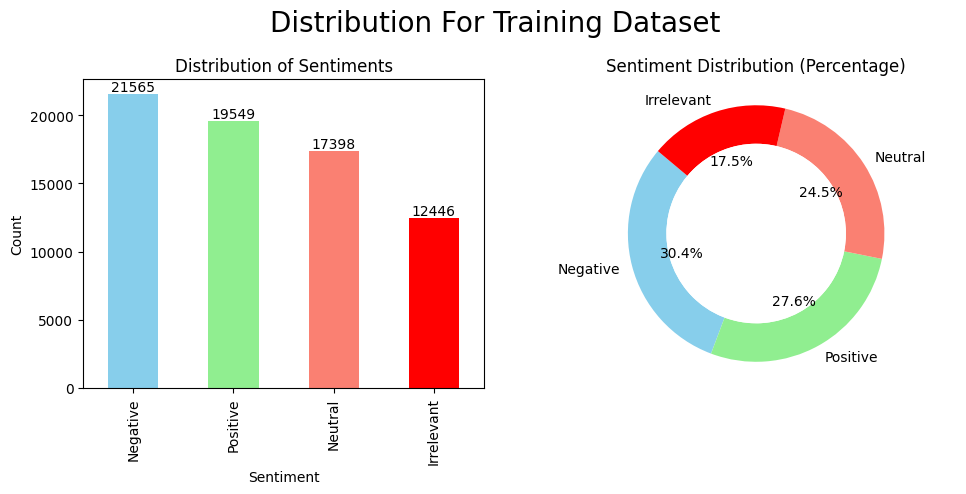

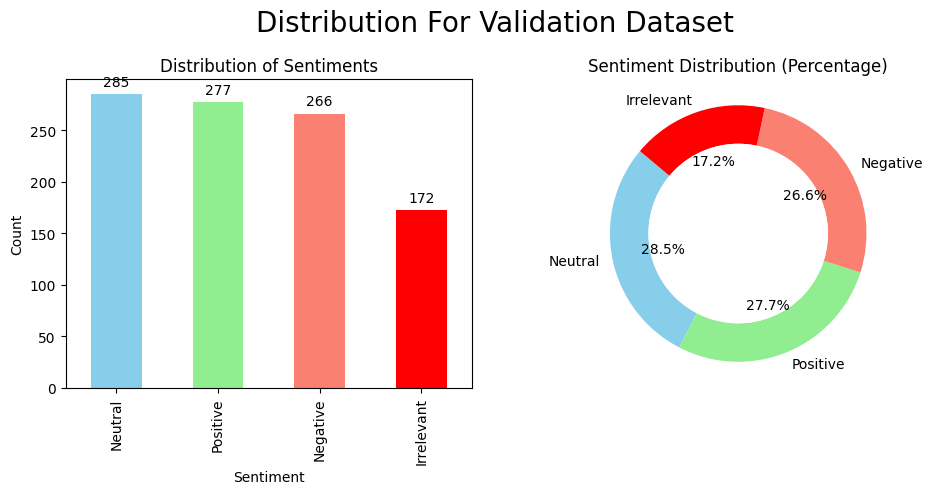

In [15]:
# Plot the Distribution of the Training Dataset
plot_sentiment_distribution(cleaned_train_data,'Training')

# Plot the Distribution of the Validation Dataset
plot_sentiment_distribution(cleaned_val_data,'Validation')


# Pre-Process the text and Handle The Unbalanced data Problem Using NLP Augmentation Techniques

**ALL Functions Of Data Augmentation Including  :**
1. POS Tagging
2. Back Translation
3. Synonym Replacement

**Function To Balance the Data by dropping samples if not using naugmentation**

In [16]:
def balance_by_removing(df, class_column='Sentiment'):
    # Find the size of the smallest class
    class_counts = df[class_column].value_counts()
    min_class_size = class_counts.min()

    # Initialize an empty DataFrame to store balanced data
    balanced_df = pd.DataFrame()

    # For each class, drop duplicates, then randomly sample 'min_class_size' unique samples and append to 'balanced_df'
    for cls in class_counts.index:
        if class_counts[cls] > min_class_size:
            class_subset = df[df[class_column] == cls].drop_duplicates()
            balanced_class_subset = class_subset.sample(n=min_class_size)
            balanced_df = pd.concat([balanced_df, balanced_class_subset], ignore_index=True)
        else:
            small_class_data = df[df[class_column] == cls]
            balanced_df = pd.concat([balanced_df, small_class_data], ignore_index=True)
            
    return balanced_df


In [17]:
###################################
# Function to Get the POS OF a Word
###################################
def get_wordnet_pos(treebank_tag):
    """
    Map POS tag to first character used by wordnet.synsets()
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

#####################################################    
# Function That Doing Back Translation to a senetence
#####################################################
def back_translation(text, src='en', mid='fr'):
    translator = Translator()
    try:
        # Translate to the intermediate language
        translation = translator.translate(text, source_language=src ,destination_language= mid)
        translated_text = translation.result

        # Translate back to the original language
        back_translation = translator.translate(translated_text, source_language=mid, destination_language=src)
        back_translated_text = back_translation.result

        return back_translated_text
    except Exception as e:
        print(f"Error during translation: {e}")
        return text.lower()  # Return original text if an error occurs
    
####################################
# Function Doing Synonym Replacement
####################################
def synonym_replacement(sentence, n):
    words = word_tokenize(sentence)
    new_words = words.copy()
    pos_tagged_words = nltk.pos_tag(words)
    
    random_word_list = list(set([word for word, pos in pos_tagged_words if get_wordnet_pos(pos)]))
    random.shuffle(random_word_list)
    num_replaced = 0
    
    for random_word in random_word_list:
        try:
            pos = get_wordnet_pos(nltk.pos_tag([random_word])[0][1])
            synonyms = wordnet.synsets(random_word, pos=pos)
            if synonyms:
                synonym = random.choice(synonyms).lemmas()[0].name()
                new_words = [synonym if word == random_word else word for word in new_words]
                num_replaced += 1
            if num_replaced >= n:
                break
        except Exception as e:
            print(f"Error processing word '{random_word}': {e}")
    
    return ' '.join(new_words).lower()

################################################################
# Function that applies The Augmentation Techniques to Sentences
################################################################
def augment_text(sentence, num_synonyms=2):
    # Apply Back Translation
    back_translated_sentence = back_translation(sentence)
    
    # Apply Synonym Replacement
    augmented_sentence = synonym_replacement(back_translated_sentence, num_synonyms)
    return augmented_sentence


##############################
# Function To Generate samples
#############################
def generate_samples(df):
    max_class_dist = df.Sentiment.value_counts().max()
    unique_sentiment_classes = np.unique(df.Sentiment)
    generated_dict = {'Company': [], 'Sentiment': [], 'Tweet': []}
    
    for cat in unique_sentiment_classes:
        sentiment_dist = df.Sentiment.value_counts()
        
        if sentiment_dist[cat] < max_class_dist:
            num_samples_to_generate = int(max_class_dist - sentiment_dist[cat])
            cat_df = df[df.Sentiment == cat].copy()
            
            if cat_df.shape[0] == 0:
                continue  # Skip if the class has no samples
            
            # Generate a list of unique random integers
            random_idx = random.sample(range(cat_df.shape[0]), min(num_samples_to_generate, cat_df.shape[0]))
            
            for i in random_idx:
                generated_dict['Company'].append(cat_df.iloc[i].Company)
                generated_dict['Sentiment'].append(cat_df.iloc[i].Sentiment)
                generated_dict['Tweet'].append(augment_text(cat_df.iloc[i].Tweet))
    
    generated_samples = pd.DataFrame(generated_dict)
    return generated_samples



**Pre-processing functions**

In [18]:
#################################################
# Function To Remove the URLs from text if exists
#################################################
def remove_url_and_domains(text):
    # Remove the URLs
    re_url = re.compile(r'https?://\S+|www\.\S+')
    text = re_url.sub('', text)
    
    # Define the regex pattern to match text containing domain-like patterns
    pattern = r'\b(?:\w+@\w+\.\w+|\w+\.\w+|\w+\.(?:com|tv|org|net|edu|gov|mil|int))\b'
    
    # Replace matched patterns with an empty string
    cleaned_text = re.sub(r'\S*\b(?:\w+@\w+\.\w+|\w+\.\w+|\w+\.(?:com|tv|org|net|edu|gov|mil|int))\b\S*', '', text)
    
    # Remove multiple spaces resulting from removal and trim leading/trailing spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    
    return cleaned_text


############################
# Function To Remove Emojies
############################
def remove_all_emojis(text):
    """
    Removes all emojis from the given text using regular expressions.
    """
    # Define a regex pattern to match emojis
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # Emoticons
        u'\U0001F300-\U0001F5FF'  # Symbols & Pictographs
        u'\U0001F680-\U0001F6FF'  # Transport & Map Symbols
        u'\U0001F700-\U0001F77F'  # Alchemical Symbols
        u'\U0001F780-\U0001F7FF'  # Geometric Shapes Extended
        u'\U0001F800-\U0001F8FF'  # Supplemental Arrows Extended-A
        u'\U0001F900-\U0001F9FF'  # Supplemental Symbols and Pictographs
        u'\U0001FA00-\U0001FA6F'  # Chess Symbols
        u'\U0001FA70-\U0001FAFF'  # Symbols and Pictographs Extended-A
        u'\U00002702-\U000027B0'  # Dingbats
        u'\U000024C2-\U0001F251'  # Enclosed Characters
        u'\U0001F004-\U0001F0CF'  # Playing Cards
        u'\U0001F18E'              # Specific Symbols
        u'\U0001F191-\U0001F251'  # Additional Symbols
        u'\U0001F600-\U0001F64F'  # Emoticons
        u'\U0001F300-\U0001F5FF'  # Symbols & Pictographs
        u'\U0001F680-\U0001F6FF'  # Transport & Map Symbols
        u'\U0001F700-\U0001F77F'  # Alchemical Symbols
        u'\U0001F780-\U0001F7FF'  # Geometric Shapes Extended
        u'\U0001F800-\U0001F8FF'  # Supplemental Arrows Extended-A
        u'\U0001F900-\U0001F9FF'  # Supplemental Symbols and Pictographs
        u'\U0001FA00-\U0001FA6F'  # Chess Symbols
        u'\U0001FA70-\U0001FAFF'  # Symbols and Pictographs Extended-A
        u'\U00002702-\U000027B0'  # Dingbats
        u'\U000024C2-\U0001F251'  # Enclosed Characters
        ']+', 
        flags=re.UNICODE
    )
    
    return emoji_pattern.sub(r'', text)


###########################################################
# Replacing some common patterns the exists in many samples 
###########################################################
# Collectd Manually
replacement_dict = {
    r'\br\b'         : 'are'           ,          r'\bwkly\b'    : 'weekly'   ,
    r'\bk\b'         : 'ok'            ,          r'\bu\b'       : 'you'      ,
    r'\btkts\b'      : 'tickets'       ,          r'\bb\b'       : 'be'       ,
    r'\baft\b'       : 'after'         ,          r'&amp;'       : ''         ,
    r'â€™'           : "'"             ,          r'\bur\b'      : 'your'     ,
    r'\bv\b'         : 'very'          ,          r'\bpls\b'     : 'please'   ,
    r'\bc\b'         : 'see'           ,          r'\blar\b'     : 'later'    ,          
    r'\bda\b'        : 'the'           ,          r'frnd'        : 'friend'   ,          
    r'\bwat\b'       : 'what'          ,          r'\babt\b'     : 'about'    ,
    r'\bwen\b'       : 'when'          ,          r'\benuff\b'   : 'enough'   ,          
    r'\bn\b'         : 'in'            ,          r'\brply\b'    : 'reply'    ,
    r'\bthk\b'       : 'think'         ,          r'\btot\b'     : 'thought'  ,
    r'\bnite\b'      : 'night'         ,          r'\bnvm\b'     : 'never mind',
    r'\btxt\b'       : 'text'          ,          r'\btxting\b'  : 'texting'  ,
    r'\bgr8\b'       : 'great'         ,          r'\bim\b'      : 'i am'     ,
    r'\b<unk>\b'     : ''              ,          r'\bfav\b'     : 'favorite' ,
    r'\bdlvr\b'      : 'deliver'       ,          r"(?<=\s)'m(?=\s)|^'m(?=\s)|(?<=\s)'m$" : 'am',
    r'\b\w*\d\w*\b'  : ''              ,          r"(?<=\s)<unk>(?=\s)|^<unk>(?=\s)|(?<=\s)<unk>$": ''           
    

}

# Define the cleaning function
def clean_tweets(df, replacement_dict):
    def replace_patterns(text):
        for pattern, replacement in replacement_dict.items():
            text = re.sub(pattern, replacement, text)
        return text
    
    df['Tweet'] = df['Tweet'].apply(replace_patterns)
    return df


###################################################
# Function To Remove the punctiuation from the text
###################################################
def remove_punctuation_and_special_characters(text):
    exclude = string.punctuation.replace("'",'')
    text = text.translate(str.maketrans('', '', exclude))
    
    # Define a regex pattern to match punctuation and special characters, including underscores
    pattern = r"[^\w\s']"
    
    # Replace matched characters with an empty string
    cleaned_text = re.sub(pattern, '', text)
    
    return cleaned_text




#############################################
# Function to correct text using SpellChecker
#############################################
spell = SpellChecker()
def correct_text(text):
    corrected_text = []
    for word in text.split():
        corrected_word = spell.correction(word)
        if corrected_word is not None:
            corrected_text.append(corrected_word)
    return ' '.join(corrected_text)


###############################
# Function To Tokenize the Text
###############################
def tokenize_text(text):
    # Check if text is None or empty
    if text is None or text.strip() == '':
        return []

    # Remove special characters or combinations of special characters
    if re.fullmatch(r'[^\w\s]', text) is not None:
        return []
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove single-character words
    tokens = [word for word in tokens if len(word) > 1]
    
    return tokens

    
    
#############################################
# Function To Remove Stop Words From the Text
#############################################
stop_words = stopwords.words('english')+["'s","'m","'t"]
def remove_stopwords(text):
    filtered_text = []
    for word in text:
        if word not in stop_words:
            filtered_text.append(word)
    return filtered_text


################################
# Function To Lemmatize the Text
################################
def lemmatize_text(text):
    if isinstance(text, list):
        # If text is a list of tokens
        doc = nlp(' '.join(text))
        lemmas = [token.lemma_ for token in doc]
    else:
        # If text is a string
        doc = nlp(text)
        lemmas = [token.lemma_ for token in doc]
    return lemmas


##################################
# Function To Plot The Word Cloud
##################################
def plot_word_clouds(df,dataset_name, text_column='Tweet', class_column='Sentiment'):
   
    classes = df[class_column].unique()
    num_classes = len(classes)
    
    # Set up the plot dimensions
    fig, axes = plt.subplots(1, num_classes, figsize=(6 * num_classes, 6), squeeze=False)
    fig.suptitle(f'Words Clouds For {dataset_name} Dataset',fontsize=25)
    
    for i, class_label in enumerate(classes):
        # Combine all tokens for the current class
        class_text = ' '.join(df[df[class_column] == class_label][text_column].apply(lambda x: ' '.join(x)))

        # Create the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(class_text)

        # Plot the word cloud
        ax = axes[0, i]
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        ax.set_title(f'{class_label} Word Cloud',fontsize=15)
    
    plt.tight_layout()
    plt.show()
    
    
#######################################################################################
# Function to plot a Side-Bar Plot for eachcategory that shows the most frequancy words
#######################################################################################
def plot_top_words(df,dataset_name, text_column, class_column, top_n=15):
    # Combine all tokens for each class
    class_tokens = {}
    for sentiment_class in df[class_column].unique():
        class_data = df[df[class_column] == sentiment_class]
        tokens = [token for sublist in class_data[text_column] for token in sublist]
        class_tokens[sentiment_class] = tokens

    # Calculate the frequency of each word for each class
    class_word_freq = {}
    for sentiment_class, tokens in class_tokens.items():
        word_freq = Counter(tokens)
        common_words = word_freq.most_common(top_n)
        class_word_freq[sentiment_class] = dict(common_words)

    # Determine the number of rows and columns for subplots
    num_classes = len(class_word_freq)
    num_cols = 2
    num_rows = math.ceil(num_classes / num_cols)

    # Set up the plot dimensions
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6 * num_rows))
    fig.suptitle(f'Frequancies for {dataset_name} Dataset', fontsize=30)
    fig.tight_layout(pad=5.0)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Plot the top words for each class
    for i, (sentiment_class, word_freq) in enumerate(class_word_freq.items()):
        ax = axes[i]
        sns.barplot(ax=ax, x=list(word_freq.values()), y=list(word_freq.keys()), palette="coolwarm_r")
        ax.set_title(f"Top {top_n} words in {sentiment_class} tweets")
        ax.set_xlabel("Frequency")
        ax.set_ylabel("Words")
        
        # Add value labels to each bar
        for index, value in enumerate(list(word_freq.values())):
            ax.text(value, index, str(value), color='black', ha="left", va="center")
        
        # Apply coolwarm color palette
        norm = plt.Normalize(min(word_freq.values()), max(word_freq.values()))
        sm = plt.cm.ScalarMappable(cmap="coolwarm_r", norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label('Frequency')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.show()

In [19]:
def preprocess_text(df,augment=False):
    # Take a Shallow Copy From the Dataset
    processed_df = df.copy()
    
    # Remove Emojis
    processed_df['Tweet'] = processed_df['Tweet'].apply(remove_all_emojis)
    
    # Remove URLs and Domain Names
    processed_df['Tweet'] = processed_df['Tweet'].apply(remove_url_and_domains)
    
    # Lowercase the Dataset
    processed_df['Tweet'] = processed_df['Tweet'].str.lower()
    
    # Replace and Remove Some Common Special Patterns
    processed_df = clean_tweets(processed_df, replacement_dict)
    
    # Remove Special Characters and Punctuation
    processed_df['Tweet'] = processed_df['Tweet'].apply(remove_punctuation_and_special_characters)
    
    # Drop any rows where 'Tweet' is NaN
    processed_df.dropna(subset=['Tweet'], inplace=True)
    
    if augment :
        # Generate Data Samples to Balance the Data
        generated_samples = generate_samples(processed_df)
        balanced_df = pd.concat([processed_df, generated_samples], ignore_index=True)
    else:
        # Balance the dataset by dropping random samples if not augmented
        balanced_df = balance_by_removing(processed_df)
    
    # Tokenization     
    balanced_df['Tweet'] = balanced_df['Tweet'].apply(tokenize_text)
    
    # Stop-words Removal     
    balanced_df['Tweet'] = balanced_df['Tweet'].apply(remove_stopwords)
    
    # Lemmatization
    balanced_df['Tweet'] = balanced_df['Tweet'].apply(lemmatize_text)
    
    return balanced_df


**Applying the Preprocessing Steps to the Datasets**

In [20]:
# Apply the Pre-Processing To the Training Dataset
balanced_train = preprocess_text(cleaned_train_data)

# Apply the Pre-Processing To the Training Dataset
balanced_val = preprocess_text(cleaned_val_data,True)

In [21]:
# Print the shapes of each dataset before and after pre-processing 
print(f'The shape of the Training dataset before Dropping is : {cleaned_train_data.shape}')
print(f'The shape of the Training dataset after Dropping is : {balanced_train.shape}')

print(f'The shape of the Validation dataset before Augmentation is : {cleaned_val_data.shape}')
print(f'The shape of the Validation dataset after Augmentation is : {balanced_val.shape}')

The shape of the Training dataset before Dropping is : (70958, 3)
The shape of the Training dataset after Dropping is : (49784, 3)
The shape of the Validation dataset before Augmentation is : (1000, 3)
The shape of the Validation dataset after Augmentation is : (1140, 3)


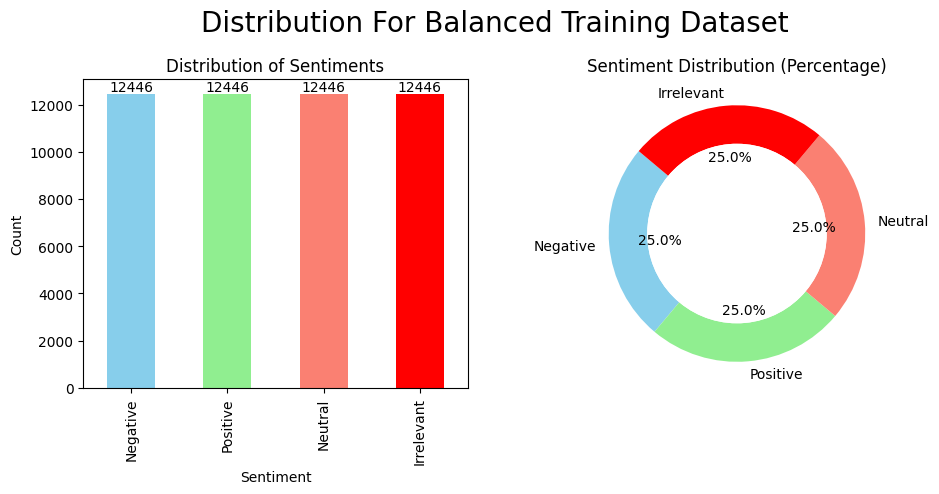

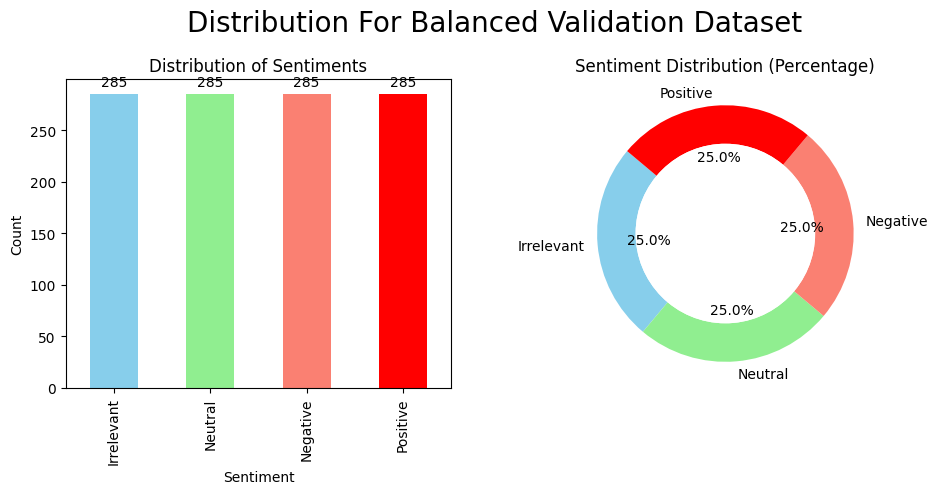

In [22]:
# Plot the Distribution of the Training Dataset
plot_sentiment_distribution(balanced_train,'Balanced Training')

# Plot the Distribution of the Validation Dataset
plot_sentiment_distribution(balanced_val,'Balanced Validation')

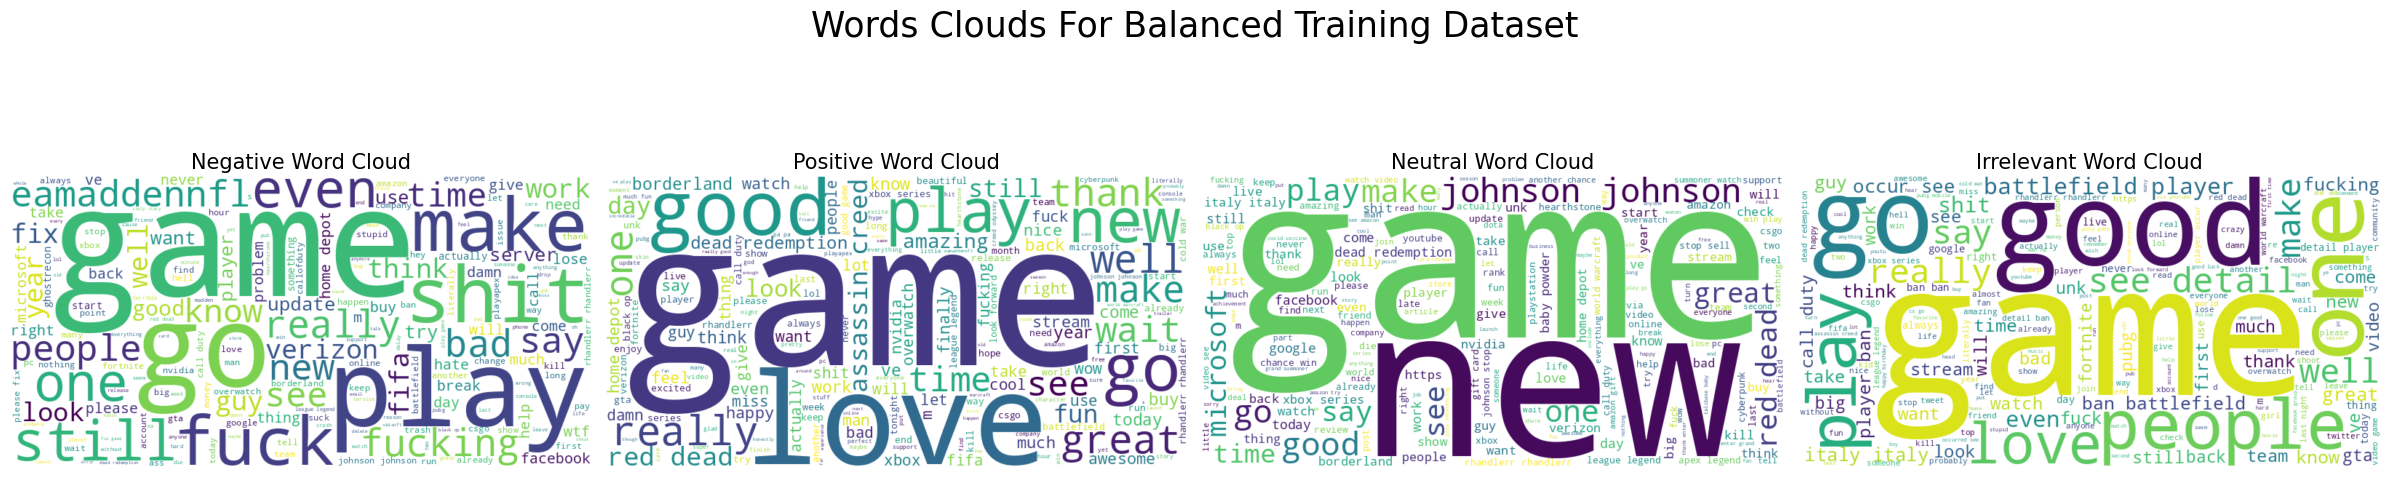

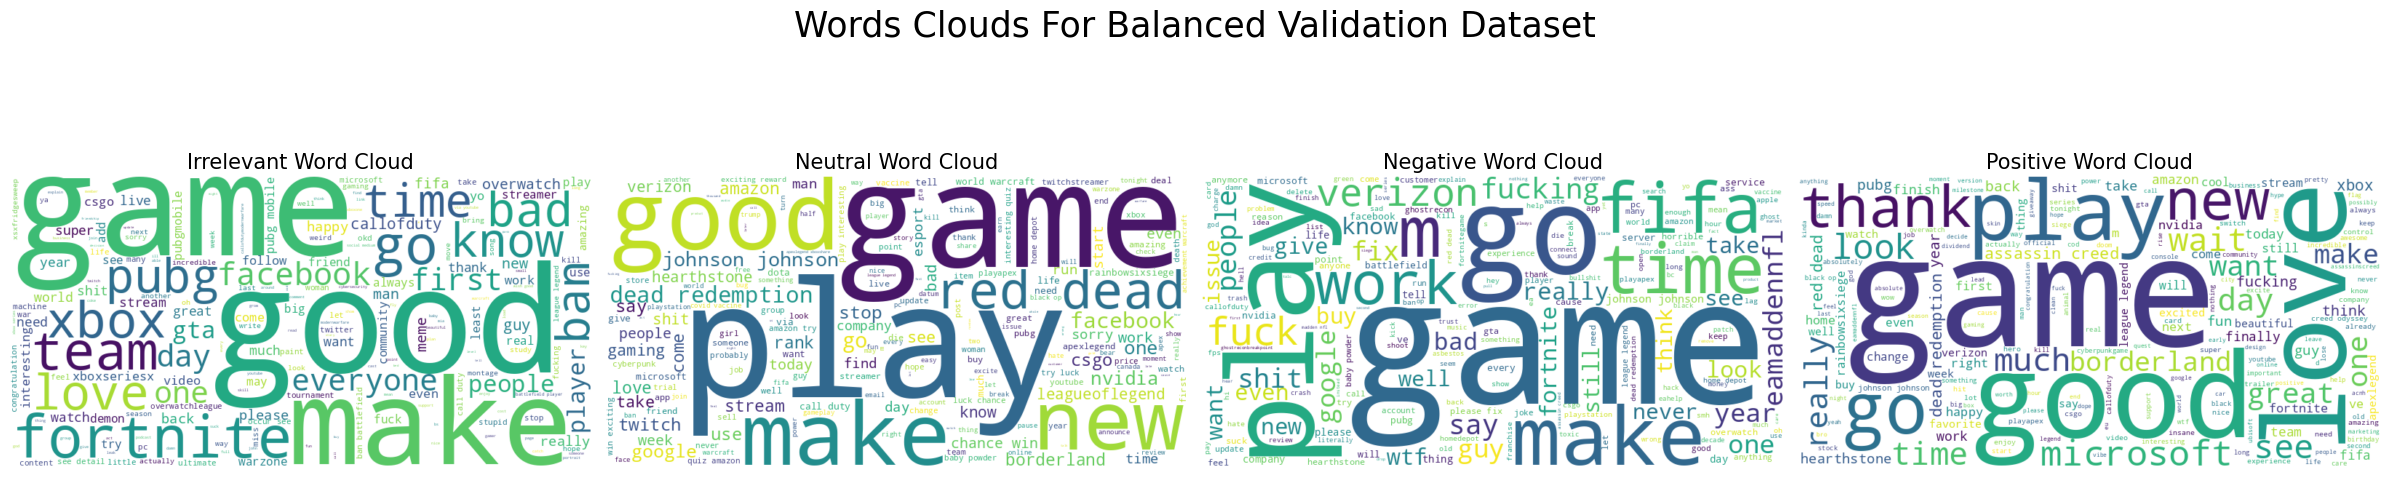

In [23]:
# Plot the Words Cloud for the Balanced Training Dataset
plot_word_clouds(balanced_train,'Balanced Training')

# Plot the Words Cloud for the Balanced Validaton Dataset
plot_word_clouds(balanced_val,'Balanced Validation')

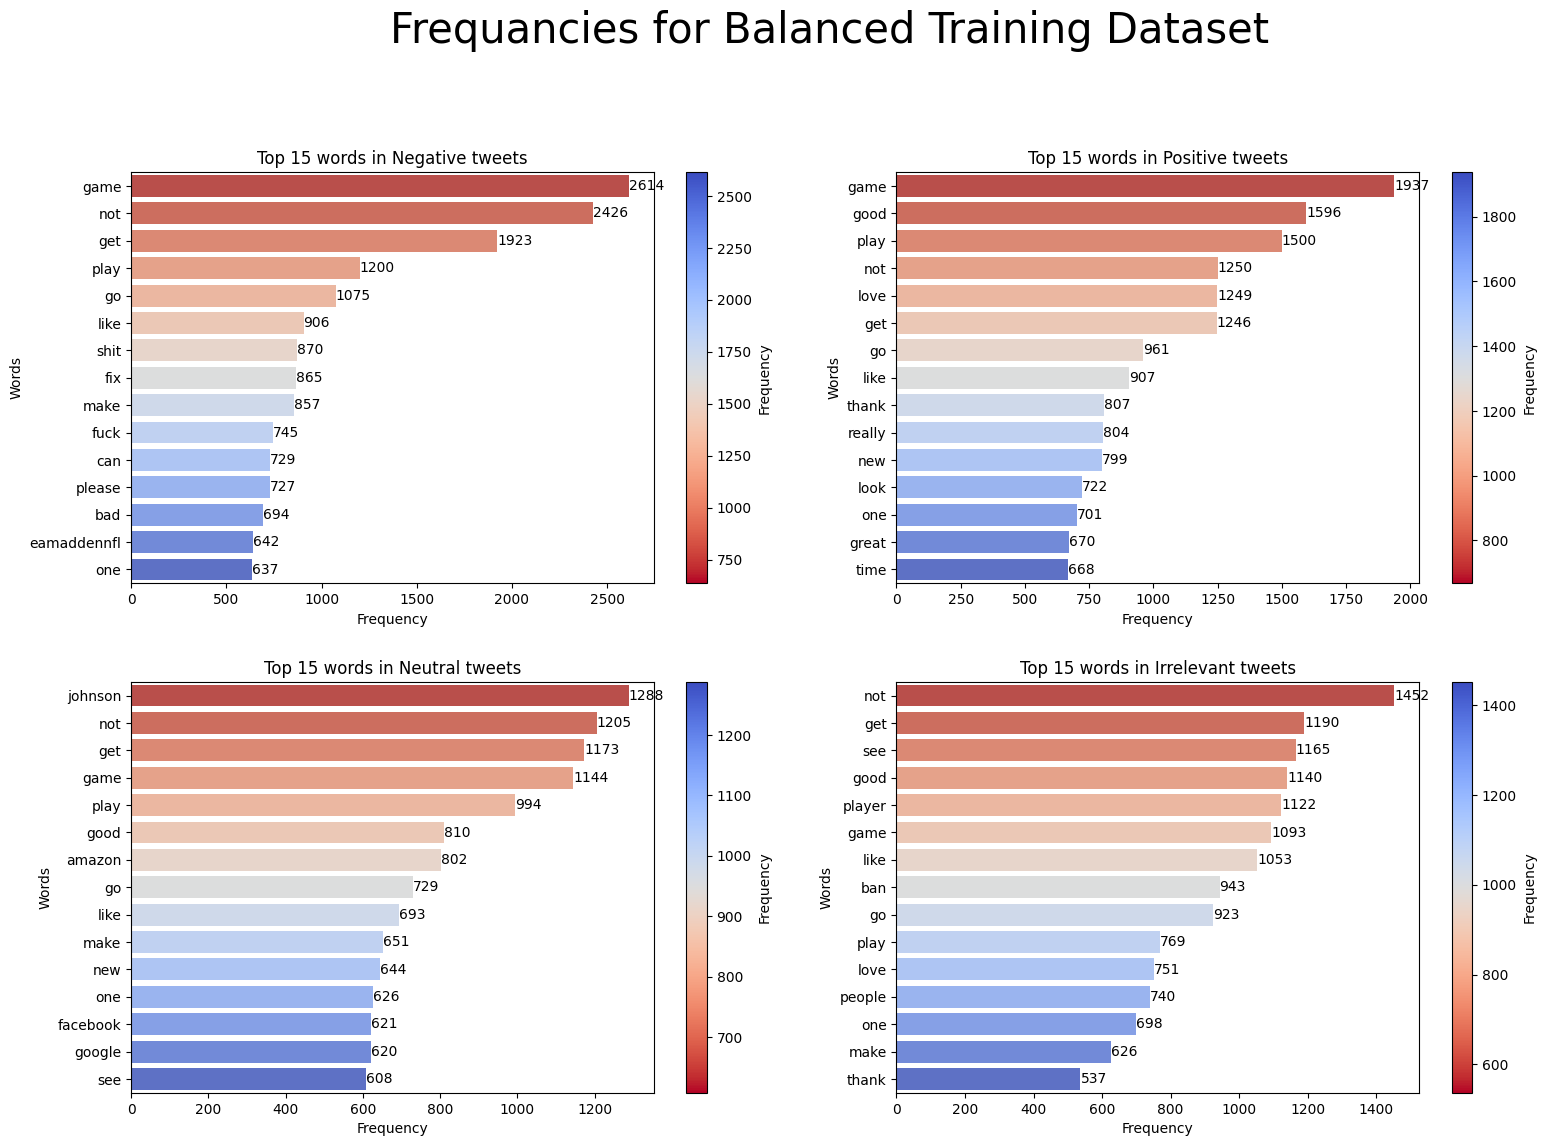

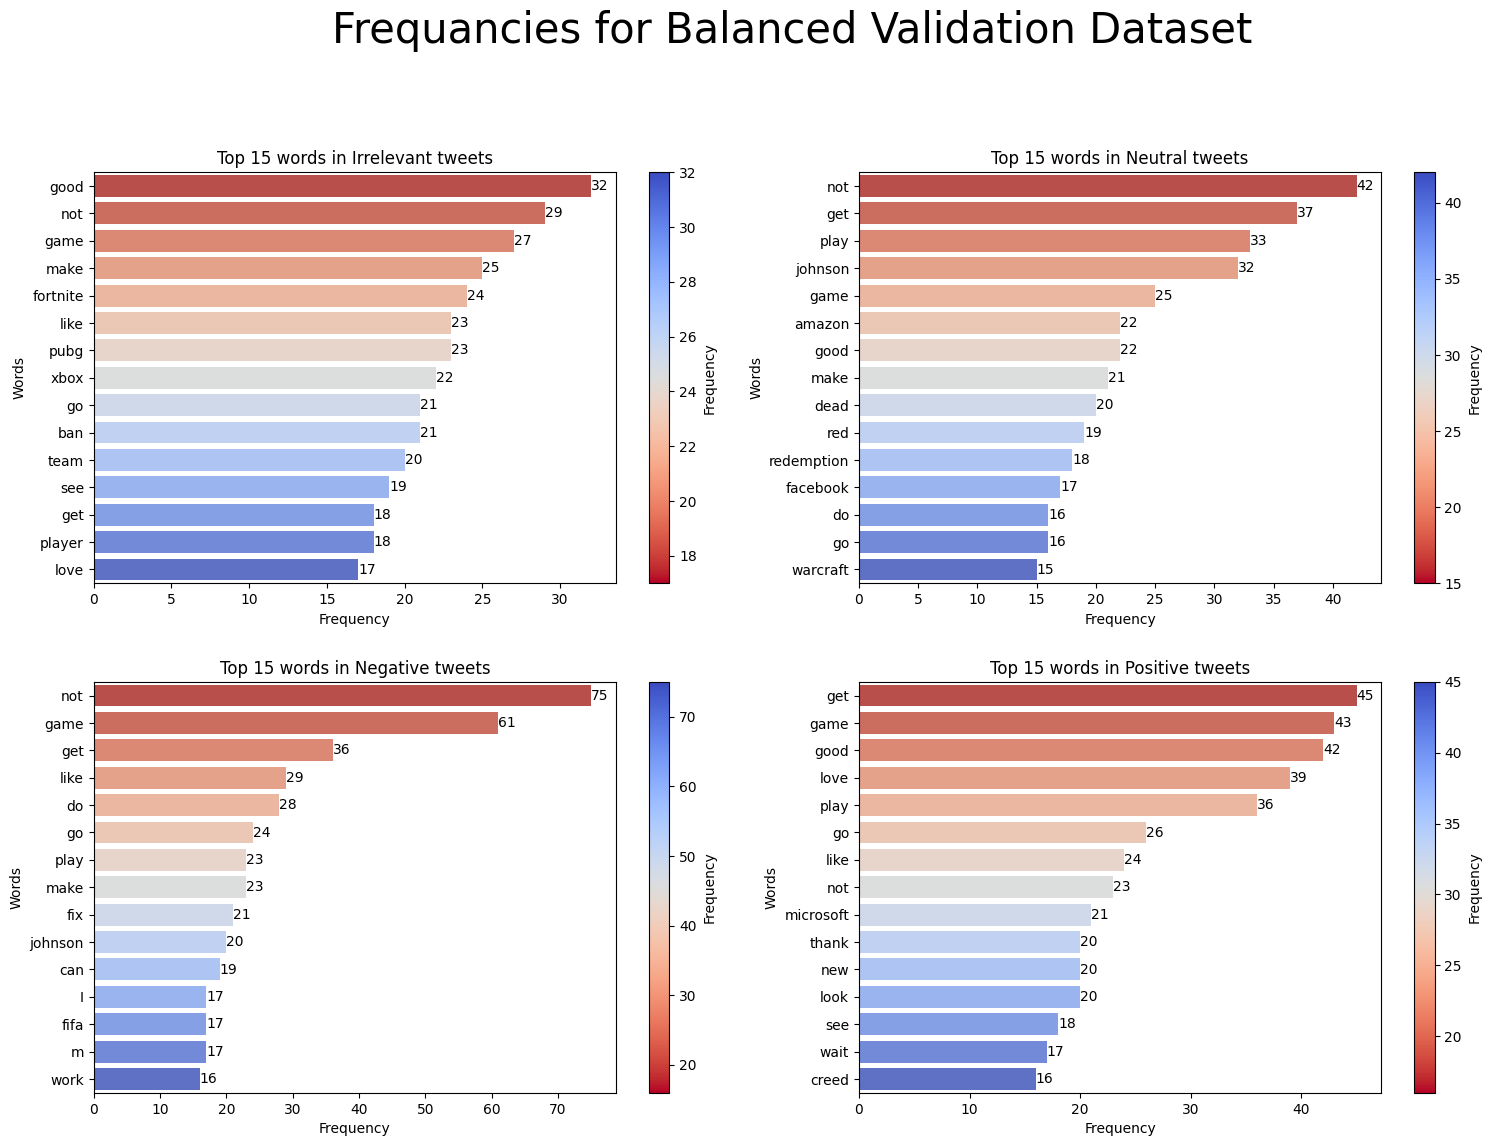

In [24]:
# Plot words Clouds For the Training Dataset
plot_top_words(balanced_train,'Balanced Training', 'Tweet', 'Sentiment')

# Plot words Clouds For the Validation Dataset
plot_top_words(balanced_val,'Balanced Validation','Tweet', 'Sentiment')

In [26]:
# Save the training pre-processed data
balanced_train.to_csv('balanced_train.csv',index=False)

# Save the validation pre-processed data
balanced_val.to_csv('balanced_val.csv',index=False)

# Applying Feature Extraction using TF-IDF and Fit The Models

**Libraries for Models and Feature Extraction**

In [27]:
balanced_train = pd.read_csv('/kaggle/working/balanced_train.csv')
balanced_val = pd.read_csv('/kaggle/working/balanced_val.csv')

In [29]:
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras.callbacks import History
from tensorflow.keras.metrics import Precision ,Recall
from sklearn.utils import shuffle

In [30]:
# Join tokens into strings
balanced_train['Tweet'] = balanced_train['Tweet'].apply(lambda tokens: ''.join(tokens))
balanced_val['Tweet'] = balanced_val['Tweet'].apply(lambda tokens: ''.join(tokens))

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train = tfidf.fit_transform(balanced_train['Tweet'])
X_val = tfidf.transform(balanced_val['Tweet'])

In [31]:
# Encode Sentiment labels
le = LabelEncoder()
y_train = le.fit_transform(balanced_train['Sentiment'])
y_val = le.transform(balanced_val['Sentiment'])


**Random Forest Model**

In [32]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on validation set
y_pred_rf = rf_model.predict(X_val)

# Evaluate the Random Forest model
print("Random Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_rf)}")
print(f"F1-score: {f1_score(y_val, y_pred_rf, average='weighted')}")
print(f"Precision: {precision_score(y_val, y_pred_rf, average='weighted')}")
print(f"Recall: {recall_score(y_val, y_pred_rf, average='weighted')}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_val, y_pred_rf))


Random Forest Classifier Metrics:
Accuracy: 0.9350877192982456
F1-score: 0.9349944768437924
Precision: 0.935130500207555
Recall: 0.9350877192982456

Confusion Matrix:
[[258  10   6  11]
 [  7 266   8   4]
 [  5   5 270   5]
 [  5   4   4 272]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       285
           1       0.93      0.93      0.93       285
           2       0.94      0.95      0.94       285
           3       0.93      0.95      0.94       285

    accuracy                           0.94      1140
   macro avg       0.94      0.94      0.93      1140
weighted avg       0.94      0.94      0.93      1140



**DNN Model**

In [38]:
# Initialize and train the Neural Network model
nn_model = Sequential()
nn_model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(len(le.classes_), activation='softmax'))

nn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │     2,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,634,692 (10.05 MB)

 Trainable params: 2,634,692 (10.05 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
nn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model and store training history
history = nn_model.fit(X_train.toarray(), y_train, epochs=10, batch_size=32, validation_data=(X_val.toarray(), y_val))

# Predict on validation set
y_pred_nn = nn_model.predict(X_val.toarray())
y_pred_nn_classes = y_pred_nn.argmax(axis=1)

Epoch 1/10
1556/1556 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.4553 - loss: 1.1825 - val_accuracy: 0.8211 - val_loss: 0.5353
Epoch 2/10
1556/1556 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7874 - loss: 0.5878 - val_accuracy: 0.9026 - val_loss: 0.3078
Epoch 3/10
1556/1556 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8844 - loss: 0.3316 - val_accuracy: 0.9219 - val_loss: 0.2543
Epoch 4/10
1556/1556 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9162 - loss: 0.2339 - val_accuracy: 0.9254 - val_loss: 0.2454
Epoch 5/10
1556/1556 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9301 - loss: 0.1937 - val_accuracy: 0.9237 - val_loss: 0.2825
Epoch 6/10
1556/1556 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9385 - loss: 0.1634 - val_accuracy: 0.9237 - val_loss: 0.2591
Epoch 7/10
1556/1556 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.9425 - loss: 0.1480 - val_accuracy: 0.9307 - val_loss: 0.2722
Epoch 8/10
1556/1556 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9495 -

In [ ]:
# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot loss
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracy
ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [36]:
# Predict on validation set
y_pred_nn = nn_model.predict(X_val.toarray())
y_pred_nn_classes = y_pred_nn.argmax(axis=1)

# Evaluate the Neural Network model
print("Neural Network Classifier Metrics:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_nn_classes)}")
print(f"F1-score: {f1_score(y_val, y_pred_nn_classes, average='weighted')}")
print(f"Precision: {precision_score(y_val, y_pred_nn_classes, average='weighted')}")
print(f"Recall: {recall_score(y_val, y_pred_nn_classes, average='weighted')}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_nn_classes))
print("\nClassification Report:")
print(classification_report(y_val, y_pred_nn_classes))

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural Network Classifier Metrics:
Accuracy: 0.9307017543859649
F1-score: 0.9306304967270482
Precision: 0.930824538084807
Recall: 0.9307017543859649

Confusion Matrix:
[[256   7  10  12]
 [  7 267   4   7]
 [  8   2 269   6]
 [  4   8   4 269]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       285
           1       0.94      0.94      0.94       285
           2       0.94      0.94      0.94       285
           3       0.91      0.94      0.93       285

    accuracy                           0.93      1140
   macro avg       0.93      0.93      0.93      1140
weighted avg       0.93      0.93      0.93      1140



**Exampel Prediction**

In [37]:
for i in np.random.randint(0,balanced_val.shape[0],10):

    # Example prediction
    example_tweet = balanced_val.iloc[i]['Tweet']
    example_tweet_vectorized = tfidf.transform([example_tweet])

    # Predict using Random Forest
    pred_rf = rf_model.predict(example_tweet_vectorized)
    # Predict using Neural Network
    pred_nn = nn_model.predict(example_tweet_vectorized.toarray())
    pred_nn_class = pred_nn.argmax(axis=1)

    print(f"Example Tweet: {example_tweet}")
    print(f"Actual Sentiment: {balanced_val.iloc[i]['Sentiment']}")
    print(f"Random Forest Prediction: {le.inverse_transform(pred_rf)[0]}")
    print(f"Neural Network Prediction: {le.inverse_transform(pred_nn_class)[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Example Tweet: ['may', 'need', 'business', 'lawyer', 'business', 'threaten', 'businesslawyer', 'gta', 'etobicokoke', 'test']
Actual Sentiment: Irrelevant
Random Forest Prediction: Irrelevant
Neural Network Prediction: Irrelevant
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Example Tweet: ['bandainamcous', 'nobody', 'appreciate', 'remove', 'games', 'nvidia', 'geforce', 'add', 'back', 'remove']
Actual Sentiment: Positive
Random Forest Prediction: Positive
Neural Network Prediction: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Example Tweet: ['buy', 'fraction', 'microsoft', 'today', 'small', 'win']
Actual Sentiment: Positive
Random Forest Prediction: Positive
Neural Network Prediction: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Example Tweet: ['congratulation', 'uc', 'csgo', 'take', 'nku', 'runback', 'last', 'night', 'win', 'bracket', 'amazing', 'play', 'member', 'team']
Actual Sentiment: Irrelevant
Random Forest Prediction: Irrelevant
Neural Network P